In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

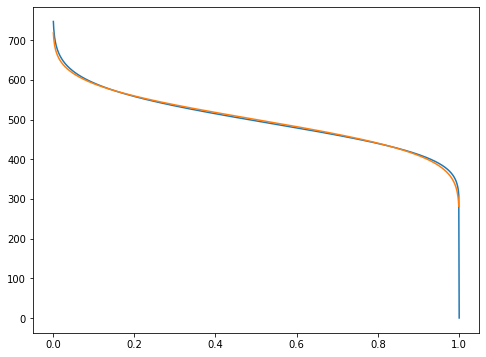

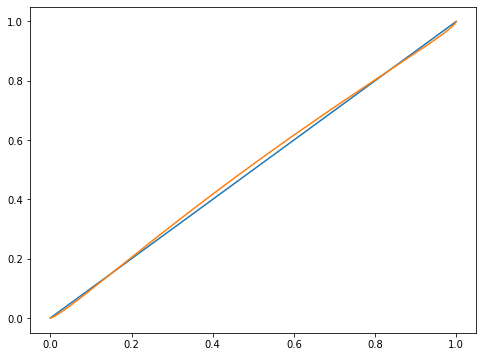

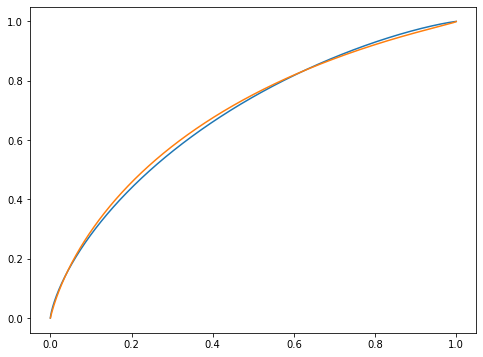

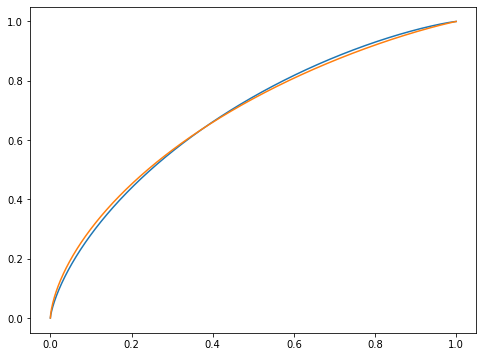

In [3]:
num_samples = 50
noise_power = 10.
signal_power = 0.

# thr = ss.chi2_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
#                             pfa=0.1,
#                             n=num_samples)
# print(f'thr {thr}')

# pfa = ss.chi2_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
#                             thr=thr,
#                             n=num_samples)
# print(f'pfa {pfa}')

# pd = ss.chi2_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
#                           signal_power=ss.util.dB_to_factor_power(signal_power),
#                           thr=thr,
#                           n=num_samples)
# print(f'pd {pd}')


pfa = np.linspace(0, 1, 1000)
thr = ss.chi2_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=pfa,
                            n=num_samples)
thr_clt = ss.clt_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
                            pfa=pfa,
                            n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, thr)
plt.plot(pfa, thr_clt)
plt.show()

pfa = ss.chi2_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)
pfa_clt = ss.clt_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
                            thr=thr,
                            n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pfa)
plt.plot(pfa, pfa_clt)
plt.show()

pd = ss.chi2_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)
pd_clt = ss.clt_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          thr=thr,
                          n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, pd)
plt.plot(pfa, pd_clt)
plt.show()

roc = ss.chi2_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)
roc_clt = ss.clt_stats.get_roc(noise_power=ss.util.dB_to_factor_power(noise_power),
                          signal_power=ss.util.dB_to_factor_power(signal_power),
                          pfa=pfa,
                          n=num_samples)
# pd_clt = ss.clt_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
#                           signal_power=ss.util.dB_to_factor_power(signal_power),
#                           thr=thr,
#                           n=num_samples)

plt.figure(figsize=(8, 6))
plt.plot(pfa, roc)
plt.plot(pfa, roc_clt)
plt.show()

In [ ]:
# def get_pfa_clt(noise_power, thr, n):  # <--
#     return stats.norm.sf(
#         (thr - n * noise_power) / (noise_power * np.sqrt(n)))


# # def get_pfa_clt2(noise_power, thr, n):
# #     return stats.norm.sf(
# #         (thr - n * noise_power) / (noise_power * np.sqrt(2*n)))

# pfa = np.linspace(0, 1, 1000)
# thr = ss.chi2_stats.get_thr(noise_power=ss.util.dB_to_factor_power(noise_power),
#                             pfa=pfa,
#                             n=num_samples)
# pfa_chi = ss.chi2_stats.get_pfa(noise_power=ss.util.dB_to_factor_power(noise_power),
#                             thr=thr,
#                             n=num_samples)
# pfa_clt = get_pfa_clt(noise_power=ss.util.dB_to_factor_power(noise_power),
#             thr=thr,
#             n=num_samples)
# pfa_clt2 = get_pfa_clt2(noise_power=ss.util.dB_to_factor_power(noise_power),
#             thr=thr,
#             n=num_samples)

# plt.figure(figsize=(8, 6))
# # plt.plot(thr, pfa)
# plt.plot(pfa, pfa_chi)
# plt.plot(pfa, pfa_clt)
# plt.plot(pfa, pfa_clt2)
# plt.show()

# def get_pd_clt(noise_power, signal_power, thr, n):  # <--
#     return stats.norm.sf((thr - n * (noise_power + signal_power)) /
#                          (np.sqrt(n) * (noise_power + signal_power)))

# def get_pd_clt2(noise_power, signal_power, thr, n):  # <--
#     return stats.norm.sf((thr - n * noise_power - n * signal_power) /
#                          (np.sqrt(2*n*noise_power**2  + signal_power+noise_power)))

# pfa = np.linspace(0, 1, 1000)
# thr = ss.chi2_stats.get_thr(
#     noise_power=ss.util.dB_to_factor_power(noise_power),
#     pfa=pfa,
#     n=num_samples)
# pfa_chi = ss.chi2_stats.get_pfa(
#     noise_power=ss.util.dB_to_factor_power(noise_power),
#     thr=thr,
#     n=num_samples)

# pd = ss.chi2_stats.get_pd(noise_power=ss.util.dB_to_factor_power(noise_power),
#                           signal_power=ss.util.dB_to_factor_power(0.),
#                           thr=thr,
#                           n=num_samples)

# pd_clt = get_pd_clt(noise_power=ss.util.dB_to_factor_power(noise_power),
#                     signal_power=ss.util.dB_to_factor_power(0.),
#                     thr=thr,
#                     n=num_samples)

# pd_clt2 = get_pd_clt2(noise_power=ss.util.dB_to_factor_power(noise_power),
#                     signal_power=ss.util.dB_to_factor_power(0.),
#                     thr=thr,
#                     n=num_samples)

# plt.figure(figsize=(8, 6))
# # plt.plot(thr, pfa)
# # plt.plot(pfa_chi, pfa)
# plt.plot(pfa_chi, pd)
# plt.plot(pfa_chi, pd_clt)
# plt.plot(pfa_chi, pd_clt2)
# plt.show()